In [ ]:
pip install gpxplotter

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.7/443.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 5.6 MB/s eta 0:00:00
  Created wheel for vincent: filename=vincent-0.4.4-py3-none-any.whl size=35149 sha256=cf6a0c52baf14682a29f706942bc3f73d727554e6a6fdf6645864fcf5240e775
  Stored in directory: /root/.cache/pip/wheels/18/a5/32/c4e033e195f545fa2682419991bc001d6f5d78159152917999
Successfully built vincent


In [ ]:
from google.colab import drive
drive.mount('/content/drive')                           #mounting my google drive on colab

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Classroom/watch8/workout-routes/"                 #checking directory under watch8 folder

route_2023-05-26_7.41pm.gpx   route_2023-07-26_5.54pm.gpx   route_2024-03-07_5.57pm.gpx
route_2023-05-27_5.55pm.gpx   route_2023-07-26_6.07pm.gpx   route_2024-03-08_7.10pm.gpx
route_2023-05-27_6.10am.gpx   route_2023-07-26_7.10pm.gpx   route_2024-03-10_3.21pm.gpx
route_2023-05-27_6.20am.gpx   route_2023-07-27_7.02pm.gpx   route_2024-03-12_5.35pm.gpx
route_2023-05-27_6.41am.gpx   route_2023-07-28_4.19pm.gpx   route_2024-03-13_5.34pm.gpx
route_2023-05-27_7.31am.gpx   route_2023-07-28_5.50pm.gpx   route_2024-03-14_5.34pm.gpx
route_2023-05-28_6.10am.gpx   route_2023-07-29_1.54pm.gpx   route_2024-03-15_5.38pm.gpx
route_2023-05-28_6.30am.gpx   route_2023-07-31_5.13am.gpx   route_2024-03-16_4.36pm.gpx
route_2023-05-28_6.56am.gpx   route_2023-07-31_5.35am.gpx   route_2024-03-18_5.08pm.gpx
route_2023-05-29_4.56pm.gpx   route_2023-07-31_5.57am.gpx   route_2024-03-19_4.46pm.gpx
route_2023-05-29_5.17pm.gpx   route_2023-08-04_5.46am.gpx   route_2024-03-20_4.31pm.gpx
route_2023-05-29_6.33pm.gpx   ro

In [ ]:
from gpxplotter import create_folium_map, read_gpx_file, add_segment_to_map
import folium
line_options = {"weight": 4}
the_map = create_folium_map(tiles="openstreetmap")
for track in read_gpx_file("/content/drive/My Drive/Classroom/watch8/workout-routes/route_2024-06-30_5.51am.gpx"):
    for i, segment in enumerate(track["segments"]):
        add_segment_to_map(
            the_map,
            segment,
            color_by="Velocity / km/h",
            cmap="viridis",
            line_options=line_options,
        )
the_map

In [ ]:
# Overlat elevation graph of selected workout :
#import vincent
import json
import numpy as np

idx = np.argmax(segment["elevation"])

data = {
    "x": segment["Distance / km"],
    "y": segment["elevation"],
}

WIDTH = 400
HEIGHT = 200


line = vincent.Line(data, iter_idx="x", width=WIDTH, height=HEIGHT)
line.axis_titles(x="Distance in km", y="Elevation in  m")
line.x_axis_properties(title_offset=2)
line.y_axis_properties(title_offset=-10)
line_json = line.to_json()
line_dict = json.loads(line_json)
#line_dict["width"] = 200
#line_dict["height"] = 200

popup = folium.Popup(max_width=WIDTH + 50, show=True)
chart = folium.Vega(line_dict, width=WIDTH + 50, height=HEIGHT + 50)
chart.add_to(popup)

marker = folium.Marker(
    location=segment["latlon"][idx],
    popup=popup,
    icon=folium.Icon(icon="heart"),
)
marker.add_to(the_map)
the_map

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from gpxplotter import read_gpx_file, create_folium_map, add_segment_to_map
from gpxplotter import plot_filled, plot_line


sns.set_context("notebook")

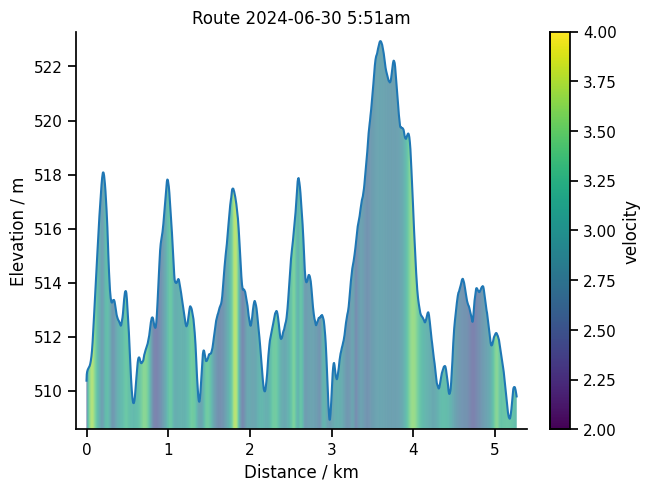

In [ ]:
for track in read_gpx_file("/content/drive/My Drive/Classroom/watch8/workout-routes/route_2024-06-30_5.51am.gpx"):
    for i, segment in enumerate(track["segments"]):
        # Plot elevation as function of distance, color by heart rate:
        fig, ax = plot_filled(
            track, segment, xvar="Distance / km", yvar="elevation", zvar="velocity"
        )
        sns.despine(fig=fig)
        break  # Stop after the first segment

In [ ]:
print(f"Elevation gain: {segment['elevation-up']}")
print(f"Elevation drop: {segment['elevation-down']}")
print(segment.keys())


Elevation gain: 61.842837999999915
Elevation drop: -62.42526599999991
dict_keys(['lat', 'lon', 'elevation', 'time', 'latlon', 'elapsed-time', 'distance', 'Distance / km', 'velocity', 'Velocity / km/h', 'pace', 'velocity-level', 'elevation-up', 'elevation-down'])


dict_keys(['name', 'type', 'segments'])


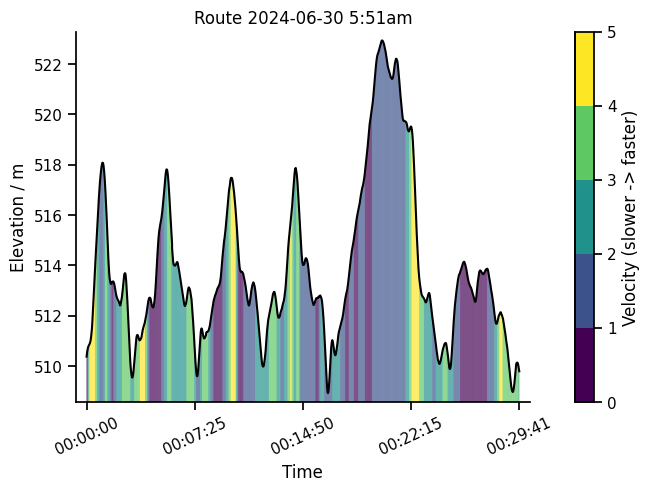

In [ ]:
fig, ax = plot_filled(
    track,
    segment,
    xvar="elapsed-time",
    yvar="elevation",
    zvar="velocity-level",
    color="k",
)
sns.despine(fig=fig)

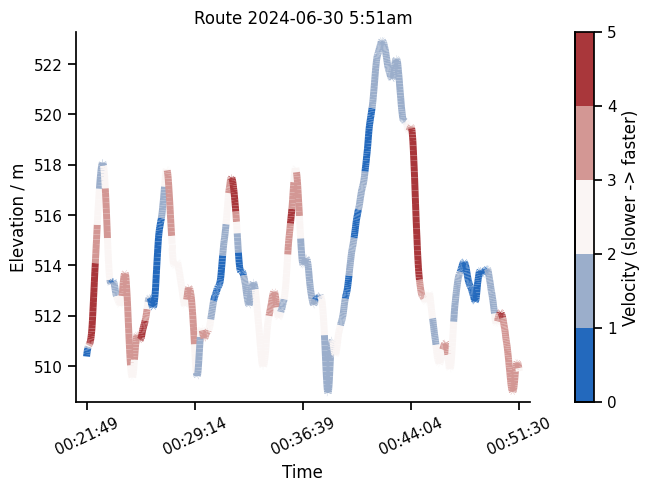

In [ ]:
fig, ax = plot_line(
    track,
    segment,
    xvar="time",
    yvar="elevation",
    zvar="velocity-level",
    lw=5,
    cmap="vlag",
)
sns.despine(fig=fig)

In [ ]:
max_speed_marker = create_folium_map()
# Add segment, color by velocity:
add_segment_to_map(max_speed_marker, segment, color_by="velocity")
# Add marker at the highest velocity:
idx = np.argmax(segment["velocity"])
high = folium.Marker(
    location=segment["latlon"][idx],
    tooltip="Highest speed",
    popup=folium.Popup(f'{segment["velocity"][idx]:g} m', max_width=250),
    icon=folium.Icon(icon="star", color="blue"),
)
high.add_to(max_speed_marker)
# Add marker at highest velocity:
idx = np.argmax(segment["velocity"])
high_sp = folium.Marker(
    location=segment["latlon"][idx],
    tooltip="Highest speed",
    popup=folium.Popup(f'{segment["velocity"][idx]:g} Km/hr', max_width=250),
    icon=folium.Icon(icon="camera", color="red"),
)
high_sp.add_to(max_speed_marker)

max_speed_marker

In [ ]:
import altair as alt
import pandas as pd

In [ ]:
def smooth(signal, points):
    """Smooth the given signal using a rectangular window."""
    window = np.ones(points) / points
    return np.convolve(signal, window, mode="same")


data2 = pd.DataFrame(
    {
        "dist": segment["Distance / km"],
        "elevation": segment["elevation"],
        "velocity": smooth(segment["velocity"], 1),
    }
)

In [ ]:
area1 = (
    alt.Chart(data2)
    .mark_area(fillOpacity=0.4, strokeWidth=5, line=True)
    .encode(
        x=alt.X("dist", title="Distance / km"),
        y=alt.Y("elevation", title="Elevation / m"),
    )
)

line2 = (
    alt.Chart(data2)
    .mark_line(strokeWidth=5)
    .encode(
        x=alt.X("dist", title="Distance / km"),
        y=alt.Y(
            "velocity",
            axis=alt.Axis(title="velocity / Km", titleColor="#1b9e77"),
        ),
        color=alt.value("#1b9e77"),
    )
)
chart = alt.layer(
    area1,
    line2,
    width=WIDTH,
    height=HEIGHT,
).resolve_scale(y="independent")

chart.title = "Elevation & velocity rate profile"


the_map = create_folium_map(tiles="openstreetmap")
add_segment_to_map(
    the_map,
    segment,
    color_by="velocity",
    cmap="viridis",
    line_options=line_options,
)


chart_dict = json.loads(chart.to_json())
popup = folium.Popup(max_width=WIDTH + 100, show=True)
chart_vega = folium.features.VegaLite(
    chart_dict, width=WIDTH + 100, height=HEIGHT + 50
)
chart_vega.add_to(popup)
marker = folium.Marker(
    location=segment["latlon"][idx],
    popup=popup,
    icon=folium.Icon(icon="star"),
)
marker.add_to(the_map)
the_map

['route_2023-05-26_7.41pm.gpx   route_2023-07-26_5.54pm.gpx   route_2024-03-07_5.57pm.gpx',
 'route_2023-05-27_5.55pm.gpx   route_2023-07-26_6.07pm.gpx   route_2024-03-08_7.10pm.gpx',
 'route_2023-05-27_6.10am.gpx   route_2023-07-26_7.10pm.gpx   route_2024-03-10_3.21pm.gpx',
 'route_2023-05-27_6.20am.gpx   route_2023-07-27_7.02pm.gpx   route_2024-03-12_5.35pm.gpx',
 'route_2023-05-27_6.41am.gpx   route_2023-07-28_4.19pm.gpx   route_2024-03-13_5.34pm.gpx',
 'route_2023-05-27_7.31am.gpx   route_2023-07-28_5.50pm.gpx   route_2024-03-14_5.34pm.gpx',
 'route_2023-05-28_6.10am.gpx   route_2023-07-29_1.54pm.gpx   route_2024-03-15_5.38pm.gpx',
 'route_2023-05-28_6.30am.gpx   route_2023-07-31_5.13am.gpx   route_2024-03-16_4.36pm.gpx',
 'route_2023-05-28_6.56am.gpx   route_2023-07-31_5.35am.gpx   route_2024-03-18_5.08pm.gpx',
 'route_2023-05-29_4.56pm.gpx   route_2023-07-31_5.57am.gpx   route_2024-03-19_4.46pm.gpx',
 'route_2023-05-29_5.17pm.gpx   route_2023-08-04_5.46am.gpx   route_2024-03-20_4